In [70]:
import numpy as np
import pandas as pd
import spacy as sp
import missingno as msno
from pathlib import Path

# Text Processing for SkLearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Bayes for two classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

# some metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load one of the CSV files to see what we are working with

In [72]:
!pwd

/home/blue/general-assembly/dsir-824/submissions/projects/project-3-master


In [73]:
data_raw = pd.read_csv('./data/reddit/nosleep/comments_epoch_1270678255-1291267532.csv')

In [74]:
df = data_raw.copy()

In [75]:
df.head()

,index,title,created_utc,selftext,subreddit,author,permalink
0,0,"In case you haven't read it in a while, or nev...",1291263661,NaN,nosleep,sjwillis,/r/nosleep/comments/eevho/in_case_you_havent_r...
1,1,"An Old One coming in to nest from the sea, dis...",1291247888,NaN,nosleep,syuk,/r/nosleep/comments/eest4/an_old_one_coming_in...
2,2,Sick Cat,1291246366,This is something that happened to my family a...,nosleep,sherlocktheholmes,/r/nosleep/comments/eesd2/sick_cat/
3,3,Enjoy. (crosspost from /r/gaming),1291235876,[deleted],nosleep,[deleted],/r/nosleep/comments/eep3l/enjoy_crosspost_from...
4,4,Since I won't be sleeping tonight I figures th...,1291207974,This happened when I was 15-16. I was a buddin...,nosleep,ShockerOnShockStreet,/r/nosleep/comments/eeh0n/since_i_wont_be_slee...


In [76]:
# Dynamically define the working directory to locate the data file

In [77]:
my_pwd = !pwd

In [78]:
my_pwd[0]

'/home/blue/general-assembly/dsir-824/submissions/projects/project-3-master'

In [79]:
def text_loader(subreddit):
    '''
    Input a subreddit as a string
    Return a dataframe which is a collection of csv files
    '''
    # get list of all files
    list_files = Path(my_pwd[0]+f'/data/reddit/{subreddit}').glob('**/c*')
    loaded_df_list = [pd.read_csv(f'./data/reddit/{subreddit}/{i.name}', encoding='utf-8', engine='c') for i in list_files]
    df = pd.concat(loaded_df_list)
    return df[['selftext', 'subreddit']]

In [80]:
df_nosleep = text_loader('nosleep')

<AxesSubplot:>

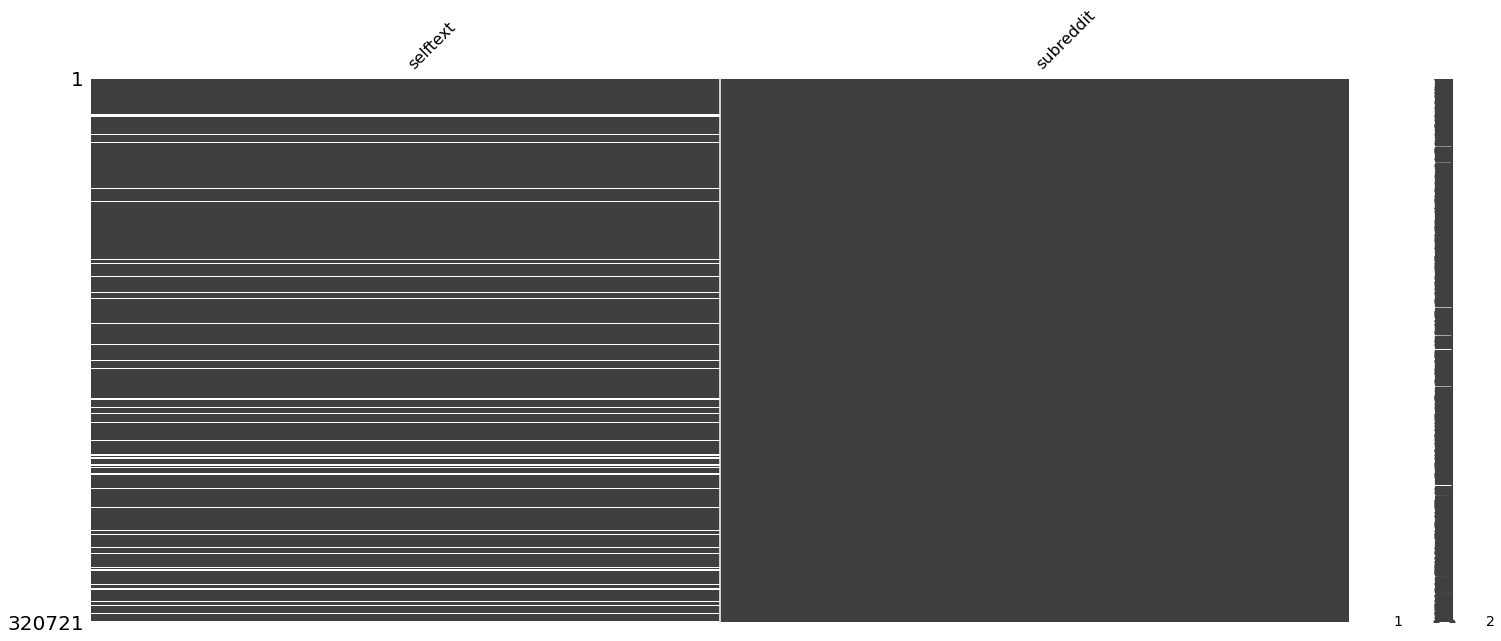

In [81]:
msno.matrix(df_nosleep)

In [82]:
# Get rid of null values, we don't care about them

In [83]:
df_nosleep = df_nosleep.dropna()

In [84]:
# Get rid of these weird values where there is no self text and the story has been removed. These are useless

In [85]:
(df_nosleep['selftext'] != '[removed]').sum()

226055

In [86]:
(df_nosleep['selftext'] == '[deleted]').sum()

11675

In [87]:
df_nosleep = df_nosleep[df_nosleep['selftext'] != '[removed]']

In [88]:
df_nosleep = df_nosleep[df_nosleep['selftext'] != '[deleted]']

<AxesSubplot:>

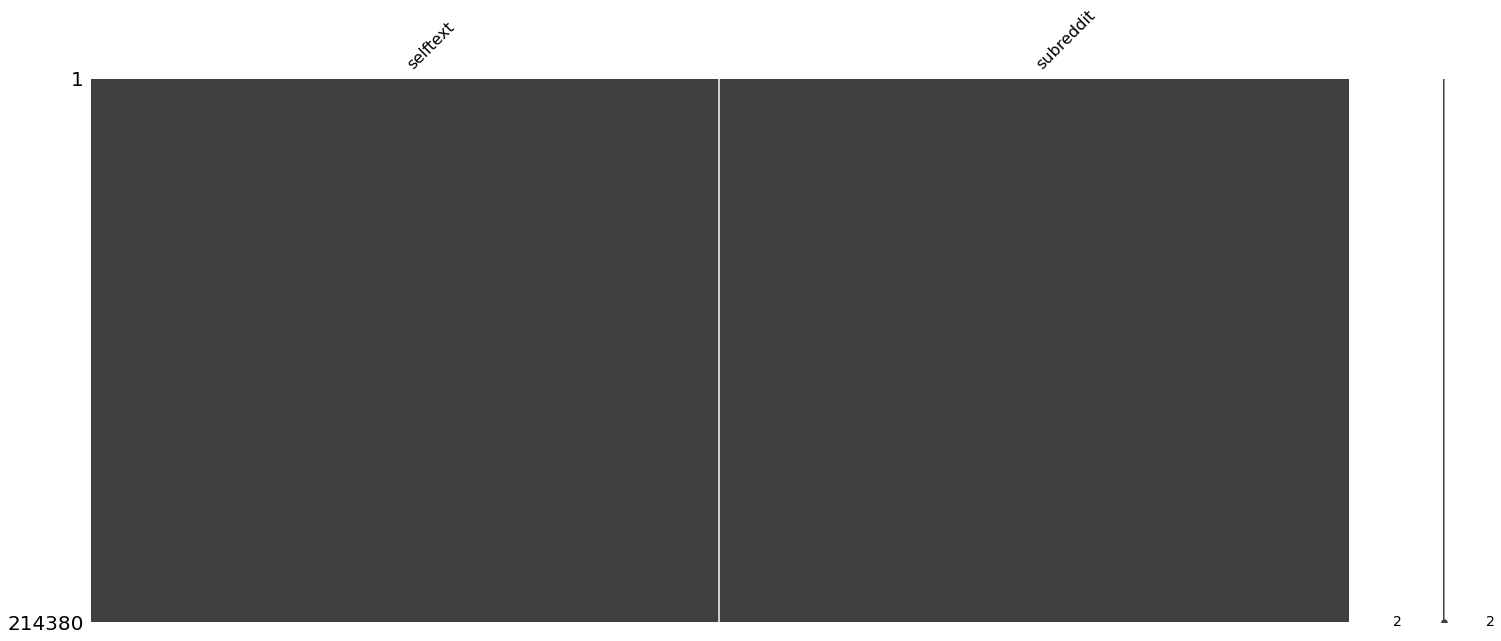

In [89]:
msno.matrix(df_nosleep)

In [21]:
df_nosleep = df_nosleep.reset_index(drop=True)

In [22]:
df_nosleep.loc[0, 'selftext']

"Have you ever had a memory that you remember so vividly, as if it happened the day before? You swear by every inch of your being that it happened. You remember just enough of the memory to trace it back to its origin, but then you realize....... it was a dream. You put your whole existence on the line, you were so positive, but in the end it was fake. This raises the question, what is real, and what is just a dream? Most of the memories you have are subconscious, and most of the time you don't think about them too hard, they're just there. In the back of your mind. What if you think really hard about every memory you have, would they all be fake? Which ones are real? Your first day of school, your pet's name, your first kiss, or even your family. What if all these things are fake. Not real, just a figment off your or somebody else's imagination. Now here's another question. Would you want to take that chance? Would you want the knowledge that your whole existence was fake, or that you

In [23]:
df_nosleep.loc[1, 'selftext']

'It all started a few days ago. We had just moved into a new place. The place was rather small and in the middle of knowwhere. It was also really cheap for some reason. It was a cute little place and we decided to get it. I never really thought anything of the place as bad. We had finally finished unpacking all of our stuff when we heard a bang. I decided to see what it was. I walked into the kitchen and saw that only a vase had fallen over and broken. I sighed and thought nothing of it as I cleaned it up. That\'s when  decided to go to bed. By now it was already 10 at night. I fixed my bed and crawled in to get some sleep. I made a huge mistake.\n\nI was having a horrible dream. The dream was about this woman. She had long black hair and this beautiful dress. I never saw her face. She was standing in front of a yard. From the looks of it, the time was around midnight. I watched her silently as she walked into a house. The house was sort of Deja vu. I followed her inside and she walked

In [90]:
df_legaladvice = text_loader('legaladvice')

In [91]:
df_legaladvice.head()

,selftext,subreddit
0,I’ll try to keep this as brief as possible. My...,legaladvice
1,Wisconsin. My apartment lease is coming to an ...,legaladvice
2,"I am in Montgomery County, PA. We purchased a ...",legaladvice
3,First of all excuse my spelling/grammar I’m wr...,legaladvice
4,Do I have recourse to sue the company I paid t...,legaladvice


<AxesSubplot:>

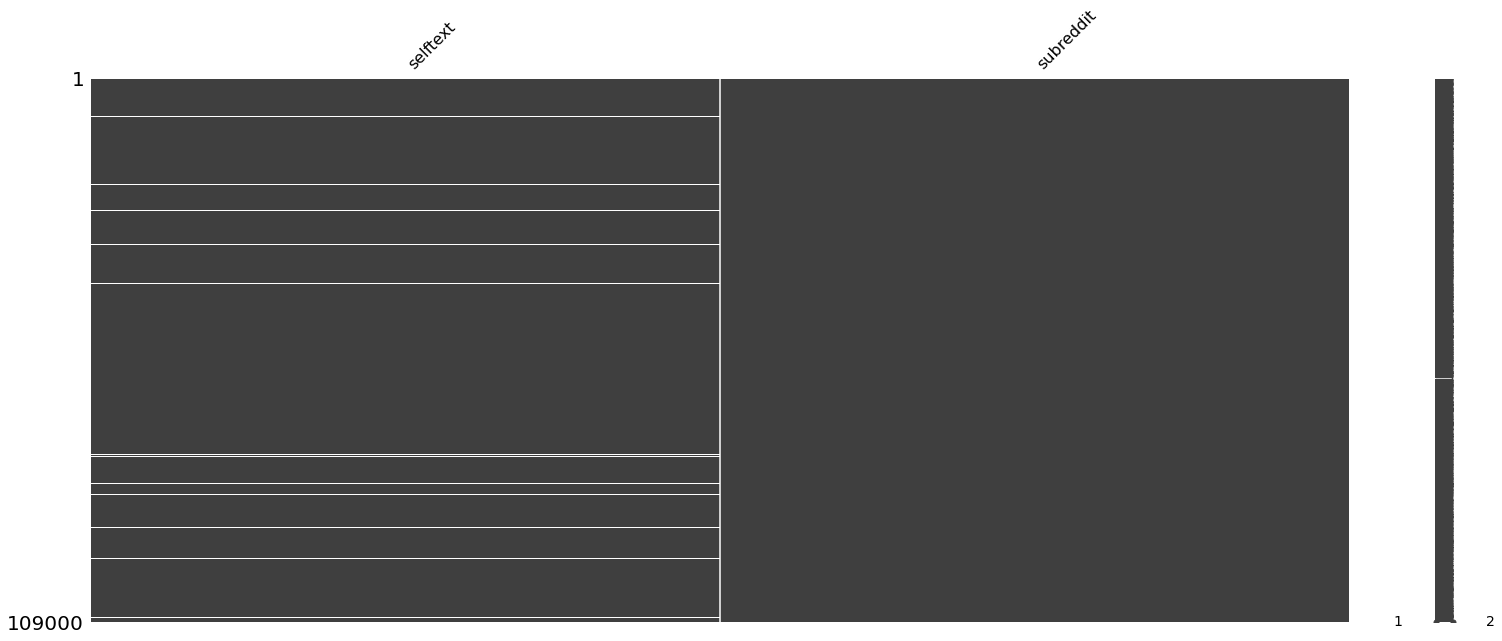

In [92]:
msno.matrix(df_legaladvice)

In [93]:
# Same thing here, get rid of nulls and the weird ['removed']

In [94]:
df_legaladvice = df_legaladvice.dropna().reset_index(drop=True)

In [95]:
(df_legaladvice['selftext'] == '[removed]').sum()

4383

In [96]:
(df_legaladvice['selftext'] == '[deleted]').sum()

3060

In [97]:
# not too many for this subreddit

In [98]:
df_legaladvice = df_legaladvice[df_legaladvice['selftext'] != '[removed]']

In [99]:
df_legaladvice = df_legaladvice[df_legaladvice['selftext'] != '[deleted]']

<AxesSubplot:>

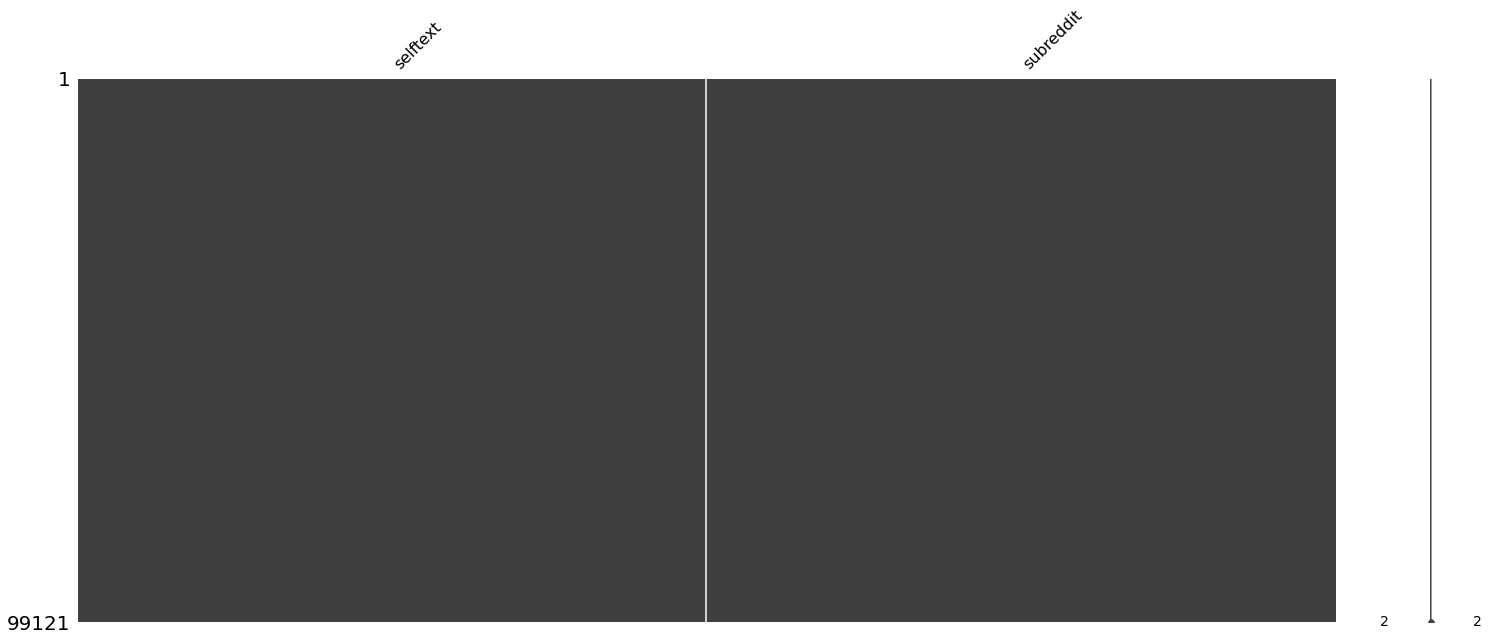

In [100]:
msno.matrix(df_legaladvice)

In [35]:
df_legaladvice.loc[0, 'selftext']

'I’ll try to keep this as brief as possible. My husband is in a local union. Last week, his company discussed lay offs and asked if everyone would be ok with 32 hour paychecks for a few weeks to keep from having to do a large lay off. They all agreed that half of the employees would take Monday off and half would take Friday. My husband was off Monday. Today, they figured out that there was a miscommunication from up above and the compromise was supposed to be no overtime for a bit, NOT shorter workweeks. So the people who were supposed to be off Friday no longer have to be. The issue is, they said that they can’t go back and pay my husband for his hours lost, and he can’t get any OT. So essentially he’s being punished for doing what he was asked to do. No one else is getting less pay for this. His yard manager and union reps have basically said “oh well sorry about your luck”. They said they can’t legally pay them for hours not worked. My question is, is there some legal aspect to thi

In [36]:
df_legaladvice.loc[1, 'selftext']

"Wisconsin. My apartment lease is coming to an end and I am planing on moving. My walk through inspection checklist used to be saved under my profile on the apartments resident portal online. I had a documents section under my profile that had my signed lease copy and inspection checklist copy. The apartment company was bought about 6 months ago and they renovated their website to another domain. Knowing that my lease was coming to an end, I went to the documents section under my profile on their new website to print the copies but they weren't there. I emailed the apartment office asking for both copies and they replied very bluntly with only the copy of the signed lease. They did not mention why they did not send the checklist copy. I had noted some flaws in the apartment upon move in, including stains on the bedroom carpet and a dent in the closet wall. I am worried they lost my inspection copy and will try to charge me for the damage they had listed. Can they legally lose the copy 

In [37]:
# I chose these two subreddits because in my experience of using them, I found that the comments and posts tend to be lengthy in size
# They are mostly text with few images, few memes, and few references
# This is a biased representation of the kinds of subreddits, but for an NLP classification problem
# Take what you can get! 

In [38]:
# Okay, all our data is together, let's smash it all together into a massive master

In [39]:
# For preformance issues, I'm going to make two sets of df_all
# df_all_big
# df_all_simple

In [40]:
df_all = pd.concat([df_legaladvice, df_nosleep])

In [41]:
df_all = df_all.reset_index(drop=True)

In [42]:
df_all['subreddit'].value_counts()

nosleep        214380
legaladvice     99121
Name: subreddit, dtype: int64

In [43]:
# We're going to have a master df_all, which has an unbalanced classification dataset
# the small one is going to have 5,000 samples from each subreddit randomly chosen
# This is to give our models the best possible preformance in learning which text came from where

In [44]:
df_all_simple = pd.concat([df_legaladvice.sample(5_000), df_nosleep.sample(5_000)])

In [45]:
df_all_simple['subreddit'].value_counts()

nosleep        5000
legaladvice    5000
Name: subreddit, dtype: int64

In [112]:
pd.DataFrame([df_nosleep.shape[0], df_legaladvice.shape[0]], index=['r/nosleep', 'r/legaladvice'], columns=['count'])

,count
r/nosleep,214380
r/legaladvice,99121


In [ ]:
# some EDA to see our data

(array([0, 1]), [Text(0, 0, 'r/nosleep'), Text(1, 0, 'r/legaladvice')])

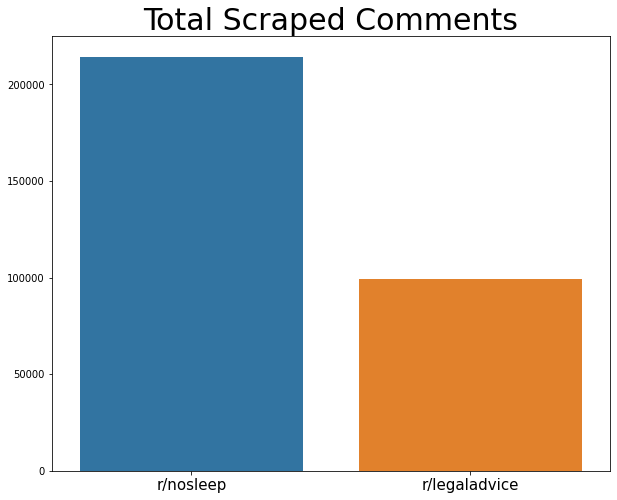

In [119]:
plt.figure(figsize=(10,8))
plt.title('Total Scraped Comments', fontsize=30)
sns.barplot(
    data=pd.DataFrame([df_nosleep.shape[0], df_legaladvice.shape[0]], 
                      index=['r/nosleep', 'r/legaladvice'], 
                      columns=['count']).T)
plt.xticks(fontsize=15)

In [129]:
word_counts = [len(i.split()) for i in df_nosleep['selftext']]

In [130]:
np.mean(word_counts)

1349.5828202257674

In [131]:
word_counts_2 = [len(i.split()) for i in df_legaladvice['selftext']]

In [132]:
np.mean(word_counts_2)

210.78405181545787

(array([0, 1]), [Text(0, 0, 'r/nosleep'), Text(1, 0, 'r/legaladvice')])

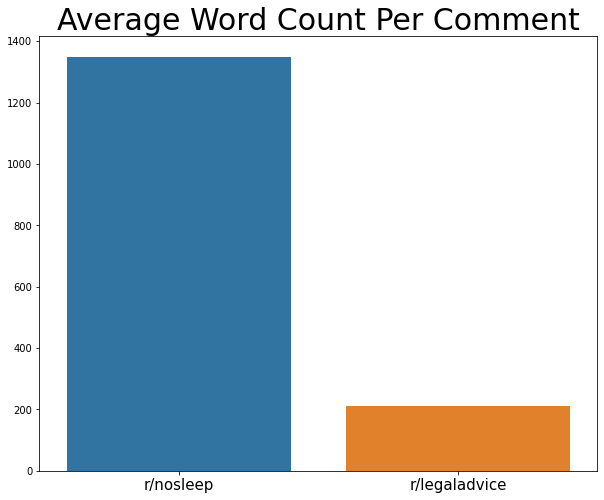

In [134]:
plt.figure(figsize=(10,8))
plt.title('Average Word Count Per Comment', fontsize=30)
sns.barplot(
    data=pd.DataFrame([np.mean(word_counts), np.mean(word_counts_2)], 
                      index=['r/nosleep', 'r/legaladvice'], 
                      columns=['count']).T)
plt.xticks(fontsize=15)

In [46]:
df_all_simple.to_csv('results/10_000_samples.csv')

In [47]:
# This looks great!

In [48]:
# Just for kicks, let's take an average word count per dataset

In [49]:
# Let's do some EDA to see what we are working with 

In [50]:
# I don't care for the stop words, so let's get rid of them

In [35]:
cv = CountVectorizer(stop_words='english', lowercase=True, max_df=0.5, decode_error='ignore',)

In [36]:
matrix = cv.fit_transform(df_all_simple['selftext'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])  

In [37]:
# Let's view our created vocabulary
df_words = pd.DataFrame(freqs, columns=['word','count'])

In [ ]:
df_words.sort_values(by='count', ascending=False).head(15).T

In [54]:
df_words.sort_values(by='count', ascending=False).iloc[-15:].T

,29646,29642,29636,29628,29627,29626,29623,29622,29621,29620,29618,29614,29612,29611,63793
word,identitiy,identifies,idems,idealism,idealises,idealised,ide,idc,idbbgk,idarticle,ida5b4,icus,icsbp4,icouldntrun,𝓽𝓸𝓭𝓪𝔂
count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [55]:
# This is some good EDA, but, I care more about the unique words. Let's use Tifdif 
# In this case I am interested in tifdif because it transformed a matrix, that we found from countvectorizer
# and instead of using those raw frequenicies of occurences (see those large word counts)
# then scale down their relative impacts, to reduce the impact they have in the learned vocaulary (corpus)
# Less frequent words will have a greater importance in their meaning towards classifying where it could have come from

In [56]:
tf_transformer_fwp = TfidfTransformer(use_idf=False)

In [57]:
X = tf_transformer_fwp.fit_transform(matrix)

In [58]:
X.shape

(10000, 63794)

In [59]:
y = df_all_simple['subreddit']

In [60]:
# Let's make a Naive Bayesian model that can try to predict if a string of text came from a horror subreddit
# or from a legal advice subreddit

# https://www.reddit.com/r/nosleep/
# Nosleep is a place for authors to share their original horror stories.

# https://www.reddit.com/r/legaladvice
# A place to ask simple legal questions, and to have legal concepts explained.

# So we're comaring horror fiction and horror reality!

In [61]:
X.shape[0] * 0.02

200.0

In [62]:
X.shape[0] * 0.98

9800.0

In [63]:
# This looks amazing, we are using 5 % to train and testing on 95 % !!!!

# This is due to my experience in doing the project that as few as 5,000 samples was able to train

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.1, stratify=y)

In [65]:
# Let's grab a baseline model

In [66]:
df_all['subreddit'].value_counts(normalize=True)

nosleep        0.683826
legaladvice    0.316174
Name: subreddit, dtype: float64

In [67]:
# Let's grab our bayesian models and others

In [68]:
bayesian_models = [BernoulliNB(), MultinomialNB()]

In [69]:
other_models = [LogisticRegression(max_iter=100_000), 
                KNeighborsClassifier(n_jobs=7), 
                DecisionTreeClassifier(), 
                BaggingClassifier(), 
                ExtraTreesClassifier(), 
                RandomForestClassifier(),
                SVC(),
                DummyClassifier(strategy='most_frequent')]

In [70]:
def evaluate_model(model_list, X_train, X_test, y_train, y_test):
    '''
    This is a list of list comprehensions to find all the metrics and evaluate the classification
    
    fitted list: output a list of the fitted models
    accuracy scores: baseline metric; what was classified corectly and what wasn't
    bal accuracy: used to consider when the dataset needs to be stratified for unbalanced datasets
    f1_train, balance of considering precision and recall: I thought it good to have to interpert
    '''
    fitted_list = [i.fit(X_train, y_train) for i in model_list]
    train_scores = [i.score(X_train, y_train) for i in fitted_list]
    bal_train_acc = [balanced_accuracy_score(y_train, i.predict(X_train)) for i in fitted_list]
    f1_train_scores = [f1_score(y_train, i.predict(X_train), pos_label='nosleep') for i in fitted_list]
    
    test_scores = [i.score(X_test, y_test) for i in fitted_list]
    bal_test_acc = [balanced_accuracy_score(y_test, i.predict(X_test)) for i in fitted_list]
    f1_test_scores = [f1_score(y_test, i.predict(X_test), pos_label='nosleep') for i in fitted_list]
    return [train_scores, bal_train_acc, f1_train_scores,
            test_scores, bal_test_acc, f1_test_scores,], fitted_list

In [71]:
scores, models = evaluate_model(bayesian_models, X_train, X_test, y_train, y_test)

In [72]:
df_scores = pd.DataFrame(scores, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['BernoilliNB', 'MultinominalB']).T

In [73]:
df_scores

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
BernoilliNB,0.917,0.917,0.910076,0.908778,0.908778,0.900352
MultinominalB,0.867,0.867,0.882197,0.808111,0.808111,0.838372


In [74]:
# quick glance, I found it odd how a bernouilli did worse than a multinominal NB, despite this being a boolean type probem

# updated glance, Bernoulli does better, much better balanced test score when we consider a small training set and a massive testing set

In [75]:
scores_other, models_other = evaluate_model(other_models, X_train, X_test, y_train, y_test)

In [76]:
df_scores_other = pd.DataFrame(scores_other, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['Logistic','KNN', 'Tree', 'Bagging Tree', 'Extra Tree', 'Random Forest', 'SVC', 'Baseline']).T

In [77]:
df_scores_other

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Logistic,0.982,0.982,0.981781,0.959667,0.959667,0.958755
KNN,0.900,0.900,0.908759,0.836556,0.836556,0.858299
Tree,1.000,1.000,1.000000,0.874111,0.874111,0.878759
Bagging Tree,0.994,0.994,0.994000,0.920333,0.920333,0.922023
Extra Tree,1.000,1.000,1.000000,0.963000,0.963000,0.963176
Random Forest,1.000,1.000,1.000000,0.954889,0.954889,0.954454
SVC,0.998,0.998,0.997996,0.962667,0.962667,0.961722
Baseline,0.500,0.500,0.000000,0.500000,0.500000,0.000000


In [78]:
df_scores_all = pd.concat([df_scores, df_scores_other])
df_scores_all.sort_values(by='Test Score', ascending=False)

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Extra Tree,1.000,1.000,1.000000,0.963000,0.963000,0.963176
SVC,0.998,0.998,0.997996,0.962667,0.962667,0.961722
Logistic,0.982,0.982,0.981781,0.959667,0.959667,0.958755
Random Forest,1.000,1.000,1.000000,0.954889,0.954889,0.954454
Bagging Tree,0.994,0.994,0.994000,0.920333,0.920333,0.922023
BernoilliNB,0.917,0.917,0.910076,0.908778,0.908778,0.900352
Tree,1.000,1.000,1.000000,0.874111,0.874111,0.878759
KNN,0.900,0.900,0.908759,0.836556,0.836556,0.858299
MultinominalB,0.867,0.867,0.882197,0.808111,0.808111,0.838372
Baseline,0.500,0.500,0.000000,0.500000,0.500000,0.000000


In [79]:
df_scores_all.to_csv('results/scores_all.csv')

In [80]:
# sorting it by test accuracy, we can quickly see the best preforming one and visually compare its metrics:

# Amazing, SVC scores close to 96 % with a train of 98 %

In [81]:
# Just because I am curious, I wonder how it can preform on the entire dataset, where it has seen some of them, but
# has not seen close to 95 % of the text data. We need to countvectorize and tifdif it before inputting but that's okay

In [82]:
# This Portion is Optional, and the results say the exact same thing

![results](assets/df_all_results.png)

In [83]:
'''
cv_all = CountVectorizer(stop_words='english', lowercase=True, max_df=0.5, decode_error='ignore',)
matrix_all = cv_all.fit_transform(df_all['selftext'])
freqs_all = zip(cv_all.get_feature_names(), matrix_all.sum(axis=0).tolist()[0])
''';

In [84]:
#X_all = tf_transformer_fwp.fit_transform(matrix_all)

In [85]:
#X_all.shape

In [86]:
#y_all = df_all['subreddit']

In [87]:
#y_all.shape

In [88]:
#X_all.shape[0] * 0.015

In [89]:
#X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, stratify=y_all, train_size=0.015)

In [90]:
#X_train_all.shape

In [91]:
#X_test_all.shape

In [92]:
# THIS WILL TAKE 30 ISH MINUTES TO RUN BE WARNED

In [93]:
#scores, models = evaluate_model([BernoulliNB(),SVC()], X_train_all, X_test_all, y_train_all, y_test_all)

In [94]:
'''
df_scores_all_data = pd.DataFrame(scores, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['Bernoulli-all','SVC-all']).T
''';

In [95]:
#df_scores_all_data

In [96]:
# Let's explore the effect of lemmatizing with these two well preforming models
# We need to beat..... 96 % accuracy in our Test and balanced test scorer

In [18]:
# I get an out of memory error (16GB RAM), so from this point I reimport the functions and reload the samples saved above from disk

In [1]:
import numpy as np
import pandas as pd
import spacy as sp
import missingno as msno
from pathlib import Path

# Text Processing for SkLearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Bayes for two classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

# some metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [3]:
bayesian_models = [BernoulliNB(), MultinomialNB()]

In [4]:
other_models = [LogisticRegression(max_iter=100_000), 
                KNeighborsClassifier(n_jobs=7), 
                DecisionTreeClassifier(), 
                BaggingClassifier(), 
                ExtraTreesClassifier(), 
                RandomForestClassifier(),
                SVC(),
                DummyClassifier(strategy='most_frequent')]

In [5]:
def evaluate_model(model_list, X_train, X_test, y_train, y_test):
    '''
    This is a list of list comprehensions to find all the metrics and evaluate the classification
    
    fitted list: output a list of the fitted models
    accuracy scores: baseline metric; what was classified corectly and what wasn't
    bal accuracy: used to consider when the dataset needs to be stratified for unbalanced datasets
    f1_train, balance of considering precision and recall: I thought it good to have to interpert
    '''
    fitted_list = [i.fit(X_train, y_train) for i in model_list]
    train_scores = [i.score(X_train, y_train) for i in fitted_list]
    bal_train_acc = [balanced_accuracy_score(y_train, i.predict(X_train)) for i in fitted_list]
    f1_train_scores = [f1_score(y_train, i.predict(X_train), pos_label='nosleep') for i in fitted_list]
    
    test_scores = [i.score(X_test, y_test) for i in fitted_list]
    bal_test_acc = [balanced_accuracy_score(y_test, i.predict(X_test)) for i in fitted_list]
    f1_test_scores = [f1_score(y_test, i.predict(X_test), pos_label='nosleep') for i in fitted_list]
    return [train_scores, bal_train_acc, f1_train_scores,
            test_scores, bal_test_acc, f1_test_scores,], fitted_list

In [6]:
df_all_simple = pd.read_csv('results/10_000_samples.csv', index_col=0)

In [7]:
df_all_simple.head()

,selftext,subreddit
85280,A classmate and I have been working on a tech ...,legaladvice
91583,"What are they thinking, is this even legal? Pe...",legaladvice
62558,So I just got scammed and sextorated on Line a...,legaladvice
24233,We have recently moved out of the place we ren...,legaladvice
37260,This guy has been knocking on my door every fe...,legaladvice


In [8]:
df_all_simple['subreddit'].value_counts()

nosleep        5000
legaladvice    5000
Name: subreddit, dtype: int64

In [9]:
# Before lemmatizing, we'll need to tokenize our text so it can be processed

In [10]:
# Use this one for testing
df_all_simple.iloc[0]['selftext']

'A classmate and I have been working on a tech company for the past 10 months. I came up with the idea and have taken on all business roles for the company. He is a systems engineer. He’s built out most of the actual software. Problem is that we’re pretty good friends and have mutually agreed that a fifty fifty split would be fair in the past. Now, we’ve both agreed that equity should not be split fifty fifty because of potential future disagreements in the future there needs to be a clear decision maker. I brought it up, and he agrees. What’s the best route for determining current equity stakes, especially if we think we will bring on two more people before raising our first round?'

In [11]:
# Lowercase the sentence
sent_tokenize(df_all_simple.iloc[0]['selftext'].lower())

['a classmate and i have been working on a tech company for the past 10 months.',
 'i came up with the idea and have taken on all business roles for the company.',
 'he is a systems engineer.',
 'he’s built out most of the actual software.',
 'problem is that we’re pretty good friends and have mutually agreed that a fifty fifty split would be fair in the past.',
 'now, we’ve both agreed that equity should not be split fifty fifty because of potential future disagreements in the future there needs to be a clear decision maker.',
 'i brought it up, and he agrees.',
 'what’s the best route for determining current equity stakes, especially if we think we will bring on two more people before raising our first round?']

In [12]:
token_sentence = [sent_tokenize(i.lower()) for i in df_all_simple['selftext']]

In [13]:
token_sentence[0]

['a classmate and i have been working on a tech company for the past 10 months.',
 'i came up with the idea and have taken on all business roles for the company.',
 'he is a systems engineer.',
 'he’s built out most of the actual software.',
 'problem is that we’re pretty good friends and have mutually agreed that a fifty fifty split would be fair in the past.',
 'now, we’ve both agreed that equity should not be split fifty fifty because of potential future disagreements in the future there needs to be a clear decision maker.',
 'i brought it up, and he agrees.',
 'what’s the best route for determining current equity stakes, especially if we think we will bring on two more people before raising our first round?']

In [14]:
# alright cool, let's split up each word into a list
tokenizer = RegexpTokenizer(r'\w+')

In [15]:
tokenizer.tokenize(df_all_simple.iloc[0]['selftext'].lower())[:10]

['a', 'classmate', 'and', 'i', 'have', 'been', 'working', 'on', 'a', 'tech']

In [16]:
token_text = [tokenizer.tokenize(i.lower()) for i in df_all_simple['selftext']]

In [17]:
token_text[1]

['what',
 'are',
 'they',
 'thinking',
 'is',
 'this',
 'even',
 'legal',
 'people',
 'could',
 'lose',
 'their',
 'jobs',
 'because',
 'of',
 'this']

In [18]:
lemmatizer.lemmatize(token_text[0][0])

'a'

In [19]:
# Now we can lemmatize the text!
# my usual approach of a list of lists makes things complicated sometimes

In [20]:
lemma_text = [[lemmatizer.lemmatize(j) for j in i] for i in token_text]

In [21]:
lemma_text[0]

['a',
 'classmate',
 'and',
 'i',
 'have',
 'been',
 'working',
 'on',
 'a',
 'tech',
 'company',
 'for',
 'the',
 'past',
 '10',
 'month',
 'i',
 'came',
 'up',
 'with',
 'the',
 'idea',
 'and',
 'have',
 'taken',
 'on',
 'all',
 'business',
 'role',
 'for',
 'the',
 'company',
 'he',
 'is',
 'a',
 'system',
 'engineer',
 'he',
 's',
 'built',
 'out',
 'most',
 'of',
 'the',
 'actual',
 'software',
 'problem',
 'is',
 'that',
 'we',
 're',
 'pretty',
 'good',
 'friend',
 'and',
 'have',
 'mutually',
 'agreed',
 'that',
 'a',
 'fifty',
 'fifty',
 'split',
 'would',
 'be',
 'fair',
 'in',
 'the',
 'past',
 'now',
 'we',
 've',
 'both',
 'agreed',
 'that',
 'equity',
 'should',
 'not',
 'be',
 'split',
 'fifty',
 'fifty',
 'because',
 'of',
 'potential',
 'future',
 'disagreement',
 'in',
 'the',
 'future',
 'there',
 'need',
 'to',
 'be',
 'a',
 'clear',
 'decision',
 'maker',
 'i',
 'brought',
 'it',
 'up',
 'and',
 'he',
 'agrees',
 'what',
 's',
 'the',
 'best',
 'route',
 'for',
 'd

In [22]:
# Let's see one
processed_lemma_text = [' '.join(lemma_text[i]) for i in range(len(lemma_text))]

In [23]:
processed_lemma_text[0]

'a classmate and i have been working on a tech company for the past 10 month i came up with the idea and have taken on all business role for the company he is a system engineer he s built out most of the actual software problem is that we re pretty good friend and have mutually agreed that a fifty fifty split would be fair in the past now we ve both agreed that equity should not be split fifty fifty because of potential future disagreement in the future there need to be a clear decision maker i brought it up and he agrees what s the best route for determining current equity stake especially if we think we will bring on two more people before raising our first round'

In [24]:
# Comparing it to the orignal

In [25]:
df_all_simple.iloc[0]['selftext']

'A classmate and I have been working on a tech company for the past 10 months. I came up with the idea and have taken on all business roles for the company. He is a systems engineer. He’s built out most of the actual software. Problem is that we’re pretty good friends and have mutually agreed that a fifty fifty split would be fair in the past. Now, we’ve both agreed that equity should not be split fifty fifty because of potential future disagreements in the future there needs to be a clear decision maker. I brought it up, and he agrees. What’s the best route for determining current equity stakes, especially if we think we will bring on two more people before raising our first round?'

In [173]:
df_all_simple.iloc[-1]['selftext']

' \n\nI\'m the type of person who likes going on long walks. I\'m not the kind of person who will go out when it\'s dark and nobody is around. At least not usually. But for the month of October and September, I like to go out at midnight to look at the decorations. Not many people are out during that time, so it adds to the creepy factor. If I\'m being honest, they were kind of a mixed bag. Some just got cheaply made inflatables from Walmart. And others completely decked out there houses for the holiday. Usually, most of the decorated houses I saw fell in between the two.\n\nI had gotten to the end of my neighborhood when I noticed something unusual. The house at the end was covered in Halloween decorations. You\'re probably wondering why that\'s unusual. Well, it\'s because that house had been abandoned for years. It had been that way ever since I moved to the neighborhood. It was a nice-looking house. So, I found it odd that nobody wanted to live in it. I would have. But I didn\'t kn

In [26]:
# In the case of lemmatizing, we are taking each word and reducing them down to their base form in an attempt to extract the overall
# meaning of the word, so that a set of 3 words ex: (creep, creepy, creeper), would have the same impact in helping us classify
# their origin

In [27]:
# After lemmatizing, let's plug this back into the count vectorizer and see what comes out so we can have a couple of models to compare

In [28]:
cv_lemma = CountVectorizer(stop_words='english', lowercase=True, max_df=0.5, decode_error='ignore',)
matrix_lemma = cv_lemma.fit_transform(processed_lemma_text)
freqs_lemma = zip(cv_lemma.get_feature_names(), matrix_lemma.sum(axis=0).tolist()[0])  

In [29]:
df_words_lemma = pd.DataFrame(freqs_lemma, columns=['word','count'])

In [30]:
# I wonder if we were able to make a smaller corpus

In [38]:
df_words.shape

(63794, 2)

In [39]:
df_words_lemma.shape

(56718, 2)

In [40]:
# Wow look at that, let's see if we were able to remove the junk and come out with the essence of horror fiction and real horror

In [57]:
# Let's run another bayesian model and see if it does any better
# reminder: this is what we are starting with, not too shabby
df_scores = pd.read_csv('results/scores_all.csv', index_col=0).sort_values(by='Test Score', ascending=False)

In [58]:
df_scores

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Extra Tree,1.000,1.000,1.000000,0.963000,0.963000,0.963176
SVC,0.998,0.998,0.997996,0.962667,0.962667,0.961722
Logistic,0.982,0.982,0.981781,0.959667,0.959667,0.958755
Random Forest,1.000,1.000,1.000000,0.954889,0.954889,0.954454
Bagging Tree,0.994,0.994,0.994000,0.920333,0.920333,0.922023
BernoilliNB,0.917,0.917,0.910076,0.908778,0.908778,0.900352
Tree,1.000,1.000,1.000000,0.874111,0.874111,0.878759
KNN,0.900,0.900,0.908759,0.836556,0.836556,0.858299
MultinominalB,0.867,0.867,0.882197,0.808111,0.808111,0.838372
Baseline,0.500,0.500,0.000000,0.500000,0.500000,0.000000


In [44]:
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    matrix_lemma, df_all_simple['subreddit'], stratify=df_all_simple['subreddit'], train_size=0.1)

In [45]:
scores_lemma, models_lemma = evaluate_model(bayesian_models, X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma)

In [46]:
df_scores_lemma= pd.DataFrame(scores_lemma, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['BernoilliNB-lemma', 'MultinominalB-lemma']).T

In [47]:
df_scores_lemma

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
BernoilliNB-lemma,0.910,0.910,0.901747,0.915667,0.915667,0.908631
MultinominalB-lemma,0.954,0.954,0.955598,0.896667,0.896667,0.905565


In [48]:
# It already looks better ! Using 10 % of data to train and 90 % to evaluate
# We're looking at an increase of 1 % accuracy - and all we did was improve our preprocessing pipeline

In [50]:
# For other models, I am only considering the top 2 preforming from the loaded results

In [49]:
scores_lemma_other, models_lemma_other = evaluate_model([ExtraTreesClassifier(), SVC()], X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma)

In [53]:
df_scores_other_lemma = pd.DataFrame(scores_lemma_other, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['Extra Tree - lemma','SVC-lemma']).T

In [54]:
df_scores_other_lemma

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Extra Tree - lemma,1.000,1.000,1.000000,0.962778,0.962778,0.96233
SVC-lemma,0.968,0.968,0.966942,0.954222,0.954222,0.95299


In [55]:
df_scores_all_lemma = pd.concat([df_scores_lemma, df_scores_other_lemma])
df_scores_all_lemma.sort_values(by='Test Score', ascending=False)

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Extra Tree - lemma,1.000,1.000,1.000000,0.962778,0.962778,0.962330
SVC-lemma,0.968,0.968,0.966942,0.954222,0.954222,0.952990
BernoilliNB-lemma,0.910,0.910,0.901747,0.915667,0.915667,0.908631
MultinominalB-lemma,0.954,0.954,0.955598,0.896667,0.896667,0.905565


In [61]:
df_scores_all_lemma.to_csv('results/scores_lemma.csv')

In [62]:
scores_lemma_logistic, models_lemma_logistic = evaluate_model([LogisticRegression()], X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma)

In [63]:
df_scores_other_logistic = pd.DataFrame(scores_lemma_logistic, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['Logistic-lemma']).T

In [64]:
df_scores_other_logistic

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Logistic-lemma,0.998,0.998,0.997996,0.968222,0.968222,0.967411


In [65]:
scores_lemma_rforest, models_lemma_rforest = evaluate_model([RandomForestClassifier()], X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma)

In [66]:
df_scores_other_rforest = pd.DataFrame(scores_lemma_rforest, index=['Train Score', 'Bal Train Score', 'f1 Train Score', 
                                        'Test Score', 'Bal Test Score', 'f1 Test score'], 
                         columns=['Random Forest']).T

In [67]:
df_scores_other_rforest

,Train Score,Bal Train Score,f1 Train Score,Test Score,Bal Test Score,f1 Test score
Random Forest,1.0,1.0,1.0,0.955111,0.955111,0.953955


In [ ]:
# some notes:
# I think I have reached the limit of machine learning without utilizing neural networks.
# This modeling is all cpu based - and so very slow. I would immediately see improvement in my sanity of
# less time spent looking at 'python busy' and more time looking at the results and making these pretty graphs

In [135]:
# Predictions

In [142]:
legal_advice = 'Both of our names will be on the birth certificate. We used an anonymous, non-ID donor from a sperm bank for conception. So I will not be biologically related to him. Friends of ours have different thoughts on what is required here, I don’t see what adopting him would do that being on his birth certificate doesn’t, but I can’t seem to find any information about it. Any help or advice would be appreciated.'

In [178]:
no_sleep_story = df_all_simple.iloc[-1]['selftext']

In [179]:
legal_sample = cv_lemma.transform(legal_advice.split())

In [180]:
no_sleep_sample = cv_lemma.transform(no_sleep_story.split())

In [181]:
models_lemma_other[1].predict(legal_sample)

array(['legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvice',
       'legaladvice', 'legaladvice', 'legaladvice', 'legaladvi

In [182]:
models_lemma_other[1].predict(no_sleep_sample)

array(['legaladvice', 'legaladvice', 'legaladvice', ..., 'legaladvice',
       'legaladvice', 'legaladvice'], dtype=object)